## !!!This is not the actual code for the project!!!
### This notebook is just for me to explore the structure of MIDI files and try out some things on them!
### Do not expect clean documentations for these codes! Sorry!
#### If you do want to see it working, make sure to change the file paths (Most of these codes will work if you open this notebook inside the 'source' folder).

In [1]:
import pandas as pd
import numpy as np

In [2]:
def read_midi_csv(midi_file_path):
    return pd.read_csv(midi_file_path, names=["Track", "Time", "Type", "Val1", "Val2", "Val3", "Val4"])

In [3]:
csv = read_midi_csv("./complete_undertale_ost.csv")

In [4]:
csv.head()

,Track,Time,Type,Val1,Val2,Val3,Val4
0,0,0,Header,1.0,2,480.0,NaN
1,1,0,Start_track,NaN,NaN,NaN,NaN
2,1,0,Time_signature,4.0,2,24.0,8.0
3,1,0,Key_signature,-1.0,"""major""",NaN,NaN
4,1,0,Key_signature,0.0,"""major""",NaN,NaN


In [5]:
def remove_quotes(midi_dataframe):
    midi = midi_dataframe.copy()
    midi.iloc[:,4] = midi.iloc[:,4].apply(lambda val: val.replace('"', '') if isinstance(val, str) else val)
    return midi

In [6]:
csv = remove_quotes(csv)

In [7]:
csv.head()

,Track,Time,Type,Val1,Val2,Val3,Val4
0,0,0,Header,1.0,2,480.0,NaN
1,1,0,Start_track,NaN,NaN,NaN,NaN
2,1,0,Time_signature,4.0,2,24.0,8.0
3,1,0,Key_signature,-1.0,major,NaN,NaN
4,1,0,Key_signature,0.0,major,NaN,NaN


In [8]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136708 entries, 0 to 136707
Data columns (total 7 columns):
Track    136708 non-null int64
Time     136708 non-null int64
Type     136708 non-null object
Val1     136703 non-null float64
Val2     136528 non-null object
Val3     136051 non-null float64
Val4     75 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 7.3+ MB


In [9]:
csv["Type"].apply(lambda str: repr(str))

0                 ' Header'
1            ' Start_track'
2         ' Time_signature'
3          ' Key_signature'
4          ' Key_signature'
5          ' Key_signature'
6          ' Key_signature'
7          ' Key_signature'
8          ' Key_signature'
9          ' Key_signature'
10         ' Key_signature'
11         ' Key_signature'
12         ' Key_signature'
13         ' Key_signature'
14         ' Key_signature'
15         ' Key_signature'
16         ' Key_signature'
17         ' Key_signature'
18         ' Key_signature'
19         ' Key_signature'
20         ' Key_signature'
21         ' Key_signature'
22         ' Key_signature'
23         ' Key_signature'
24         ' Key_signature'
25         ' Key_signature'
26         ' Key_signature'
27         ' Key_signature'
28         ' Key_signature'
29         ' Key_signature'
                ...        
136678         ' Note_on_c'
136679         ' Note_on_c'
136680         ' Note_on_c'
136681         ' Note_on_c'
136682         ' Not

In [10]:
print(csv["Type"].apply(lambda str: str.startswith(' ')).count())
print(csv["Type"].count())

136708
136708


In [11]:
sorted(csv[csv['Type'] == ' Tempo']['Val1'].unique())

[250000.0,
 267857.0,
 315789.0,
 322581.0,
 326087.0,
 333333.0,
 340909.0,
 348837.0,
 365854.0,
 375000.0,
 392157.0,
 394737.0,
 400000.0,
 405405.0,
 416667.0,
 428572.0,
 434783.0,
 444444.0,
 454545.0,
 461538.0,
 468751.0,
 476190.0,
 480001.0,
 483870.0,
 500000.0,
 517242.0,
 521738.0,
 526316.0,
 535713.0,
 555556.0,
 588235.0,
 599999.0,
 625000.0,
 652175.0,
 666667.0,
 714286.0,
 750002.0,
 769231.0,
 789472.0,
 833333.0,
 857140.0,
 882356.0,
 909091.0,
 1000000.0,
 1071429.0,
 1153846.0,
 1200000.0,
 1250000.0,
 1499999.0]

In [12]:
csv.loc[csv['Type'] == ' Tempo']['Val1'].describe()

count    1.730000e+02
mean     5.970737e+05
std      2.383132e+05
min      2.500000e+05
25%      4.285720e+05
50%      5.357130e+05
75%      7.500020e+05
max      1.499999e+06
Name: Val1, dtype: float64

In [13]:
csv.loc[csv['Type'] == ' Tempo']

,Track,Time,Type,Val1,Val2,Val3,Val4
97,1,0,Tempo,909091.0,NaN,NaN,NaN
388,1,48000,Tempo,333333.0,NaN,NaN,NaN
522,1,63360,Tempo,333333.0,NaN,NaN,NaN
788,1,96000,Tempo,483870.0,NaN,NaN,NaN
863,1,120960,Tempo,535713.0,NaN,NaN,NaN
1292,1,167040,Tempo,535713.0,NaN,NaN,NaN
1720,1,214560,Tempo,434783.0,NaN,NaN,NaN
2365,1,316800,Tempo,428572.0,NaN,NaN,NaN
2440,1,332160,Tempo,428572.0,NaN,NaN,NaN
2634,1,380160,Tempo,326087.0,NaN,NaN,NaN


In [14]:
csv.loc[csv['Type'] == ' Tempo']['Val1'].mean()

597073.6936416185

In [15]:
csv.loc[csv['Type'] == ' Tempo']['Val1'].median()

535713.0

In [16]:
temp = csv.copy()

In [17]:
temp.loc[temp['Type'] == ' Tempo', 'Val1'] = round(csv.loc[csv['Type'] == ' Tempo']['Val1'].mean())

In [18]:
temp.loc[csv['Type'] == ' Tempo']

,Track,Time,Type,Val1,Val2,Val3,Val4
97,1,0,Tempo,597074.0,NaN,NaN,NaN
388,1,48000,Tempo,597074.0,NaN,NaN,NaN
522,1,63360,Tempo,597074.0,NaN,NaN,NaN
788,1,96000,Tempo,597074.0,NaN,NaN,NaN
863,1,120960,Tempo,597074.0,NaN,NaN,NaN
1292,1,167040,Tempo,597074.0,NaN,NaN,NaN
1720,1,214560,Tempo,597074.0,NaN,NaN,NaN
2365,1,316800,Tempo,597074.0,NaN,NaN,NaN
2440,1,332160,Tempo,597074.0,NaN,NaN,NaN
2634,1,380160,Tempo,597074.0,NaN,NaN,NaN


In [19]:
# temp.to_csv('./temp.csv', header=False, index=False)

In [20]:
temp.loc[temp['Type'] == ' Tempo', 'Val1'] = round(csv.loc[csv['Type'] == ' Tempo']['Val1'].median())

In [21]:
temp.loc[csv['Type'] == ' Tempo']

,Track,Time,Type,Val1,Val2,Val3,Val4
97,1,0,Tempo,535713.0,NaN,NaN,NaN
388,1,48000,Tempo,535713.0,NaN,NaN,NaN
522,1,63360,Tempo,535713.0,NaN,NaN,NaN
788,1,96000,Tempo,535713.0,NaN,NaN,NaN
863,1,120960,Tempo,535713.0,NaN,NaN,NaN
1292,1,167040,Tempo,535713.0,NaN,NaN,NaN
1720,1,214560,Tempo,535713.0,NaN,NaN,NaN
2365,1,316800,Tempo,535713.0,NaN,NaN,NaN
2440,1,332160,Tempo,535713.0,NaN,NaN,NaN
2634,1,380160,Tempo,535713.0,NaN,NaN,NaN


In [22]:
# temp.to_csv('./temp.csv', header=False, index=False)

In [23]:
csv['Type'].unique()

array([' Header', ' Start_track', ' Time_signature', ' Key_signature',
       ' Tempo', ' Control_c', ' Program_c', ' MIDI_port', ' Note_on_c',
       ' End_track', ' End_of_file'], dtype=object)

In [24]:
csv.loc[csv['Type'] == ' Header']

,Track,Time,Type,Val1,Val2,Val3,Val4
0,0,0,Header,1.0,2,480.0,NaN


In [25]:
csv.loc[csv['Type'] == ' Start_track']

,Track,Time,Type,Val1,Val2,Val3,Val4
1,1,0,Start_track,NaN,NaN,NaN,NaN
71448,2,0,Start_track,NaN,NaN,NaN,NaN


In [26]:
csv.loc[csv['Type'] == ' End_track']

,Track,Time,Type,Val1,Val2,Val3,Val4
71447,1,7743264,End_track,NaN,NaN,NaN,NaN
136706,2,7743360,End_track,NaN,NaN,NaN,NaN


In [27]:
csv.loc[csv['Type'] == ' End_of_file']

,Track,Time,Type,Val1,Val2,Val3,Val4
136707,0,0,End_of_file,NaN,NaN,NaN,NaN


In [28]:
csv.loc[csv['Type'] == ' Control_c']

,Track,Time,Type,Val1,Val2,Val3,Val4
98,1,0,Control_c,0.0,121,0.0,NaN
100,1,0,Control_c,0.0,7,100.0,NaN
101,1,0,Control_c,0.0,10,64.0,NaN
102,1,0,Control_c,0.0,91,0.0,NaN
103,1,0,Control_c,0.0,93,0.0,NaN
38163,1,3960482,Control_c,0.0,64,127.0,NaN
38583,1,3968881,Control_c,0.0,64,0.0,NaN
79028,2,1112642,Control_c,0.0,64,127.0,NaN
79029,2,1114561,Control_c,0.0,64,0.0,NaN
79030,2,1114562,Control_c,0.0,64,127.0,NaN


In [29]:
csv.loc[csv['Type'] == ' Program_c']

,Track,Time,Type,Val1,Val2,Val3,Val4
99,1,0,Program_c,0.0,0,NaN,NaN


In [30]:
csv.loc[csv['Type'] == ' MIDI_port']

,Track,Time,Type,Val1,Val2,Val3,Val4
104,1,0,MIDI_port,0.0,NaN,NaN,NaN
71543,2,0,MIDI_port,0.0,NaN,NaN,NaN


In [31]:
csv.loc[csv['Type'] == ' Note_on_c']

,Track,Time,Type,Val1,Val2,Val3,Val4
105,1,0,Note_on_c,0.0,72,80.0,NaN
106,1,455,Note_on_c,0.0,72,0.0,NaN
107,1,480,Note_on_c,0.0,84,80.0,NaN
108,1,935,Note_on_c,0.0,84,0.0,NaN
109,1,960,Note_on_c,0.0,79,80.0,NaN
110,1,1415,Note_on_c,0.0,79,0.0,NaN
111,1,1920,Note_on_c,0.0,77,80.0,NaN
112,1,2375,Note_on_c,0.0,77,0.0,NaN
113,1,2400,Note_on_c,0.0,84,80.0,NaN
114,1,2855,Note_on_c,0.0,84,0.0,NaN


In [32]:
csv.loc[csv['Type'] == ' Time_signature']

,Track,Time,Type,Val1,Val2,Val3,Val4
2,1,0,Time_signature,4.0,2,24.0,8.0
861,1,120960,Time_signature,3.0,2,24.0,8.0
1290,1,167040,Time_signature,3.0,2,24.0,8.0
2363,1,316800,Time_signature,4.0,2,24.0,8.0
2438,1,332160,Time_signature,4.0,2,24.0,8.0
4541,1,560640,Time_signature,3.0,2,24.0,8.0
4600,1,572160,Time_signature,3.0,2,24.0,8.0
4933,1,608160,Time_signature,4.0,2,24.0,8.0
5307,1,827040,Time_signature,6.0,3,24.0,8.0
6618,1,932160,Time_signature,4.0,2,24.0,8.0


In [33]:
csv.loc[csv['Type'] == ' Key_signature']

,Track,Time,Type,Val1,Val2,Val3,Val4
3,1,0,Key_signature,-1.0,major,NaN,NaN
4,1,0,Key_signature,0.0,major,NaN,NaN
5,1,0,Key_signature,0.0,major,NaN,NaN
6,1,0,Key_signature,0.0,major,NaN,NaN
7,1,0,Key_signature,0.0,major,NaN,NaN
8,1,0,Key_signature,0.0,major,NaN,NaN
9,1,0,Key_signature,0.0,major,NaN,NaN
10,1,0,Key_signature,0.0,major,NaN,NaN
11,1,0,Key_signature,0.0,major,NaN,NaN
12,1,0,Key_signature,0.0,major,NaN,NaN


In [34]:
# condition = (csv['Type'] == ' Key_signature') | (csv['Type'] == ' Tempo')
# csv.drop(index=csv.loc[condition].index).to_csv('./const_tempo-no_key_change.csv', header=False, index=False)

In [35]:
# condition = (csv['Type'] == ' Time_signature') | (csv['Type'] == ' Key_signature') | (csv['Type'] == ' Tempo')
# csv.drop(index=csv.loc[condition].index).to_csv('./const_tempo-no_key_change-no_time_change.csv', header=False, index=False)

In [36]:
# condition = csv['Type'].map(lambda str: str in [' Tempo', ' Control_c', ' Program_c', ' MIDI_port', ' Key_signature', ' Time_signature'])
# csv.drop(index=csv.loc[condition].index).to_csv('./noextras.csv', header=False, index=False)

In [37]:
# condition = csv['Type'].map(lambda str: str in [' Tempo', ' Control_c', ' Program_c', ' MIDI_port', ' Key_signature', ' Time_signature'])
# temp = csv.drop(index=csv.loc[condition].index)
# temp.loc[temp['Type'] == ' Note_on_c', 'Val3'] = temp.loc[temp['Type'] == ' Note_on_c', 'Val3'].apply(lambda val: 80 if val > 0 else 0)
# temp.to_csv('./basic.csv', header=False, index=False)

In [38]:
non_essential = csv['Type'].apply(lambda str: str in [' Control_c', ' Program_c', ' MIDI_port', ' Time_signature'])
basic = csv.drop(index=csv.loc[non_essential].index)

In [39]:
basic['Type'].unique()

array([' Header', ' Start_track', ' Key_signature', ' Tempo',
       ' Note_on_c', ' End_track', ' End_of_file'], dtype=object)

In [40]:
basic.head(10)

,Track,Time,Type,Val1,Val2,Val3,Val4
0,0,0,Header,1.0,2,480.0,NaN
1,1,0,Start_track,NaN,NaN,NaN,NaN
3,1,0,Key_signature,-1.0,major,NaN,NaN
4,1,0,Key_signature,0.0,major,NaN,NaN
5,1,0,Key_signature,0.0,major,NaN,NaN
6,1,0,Key_signature,0.0,major,NaN,NaN
7,1,0,Key_signature,0.0,major,NaN,NaN
8,1,0,Key_signature,0.0,major,NaN,NaN
9,1,0,Key_signature,0.0,major,NaN,NaN
10,1,0,Key_signature,0.0,major,NaN,NaN


In [41]:
basic.loc[basic['Track'] == 1].tail(10)

,Track,Time,Type,Val1,Val2,Val3,Val4
71438,1,7740431,Note_on_c,0.0,95,0.0,NaN
71439,1,7740480,Tempo,833333.0,NaN,NaN,NaN
71440,1,7740480,Note_on_c,0.0,90,80.0,NaN
71441,1,7741391,Note_on_c,0.0,90,0.0,NaN
71442,1,7741440,Tempo,909091.0,NaN,NaN,NaN
71443,1,7741440,Note_on_c,0.0,81,80.0,NaN
71444,1,7741440,Note_on_c,0.0,88,80.0,NaN
71445,1,7743263,Note_on_c,0.0,81,0.0,NaN
71446,1,7743263,Note_on_c,0.0,88,0.0,NaN
71447,1,7743264,End_track,NaN,NaN,NaN,NaN


In [42]:
basic.loc[basic['Track'] == 2].tail(10)

,Track,Time,Type,Val1,Val2,Val3,Val4
136697,2,7740455,Note_on_c,0.0,74,0.0,NaN
136698,2,7740480,Note_on_c,0.0,78,80.0,NaN
136699,2,7741391,Note_on_c,0.0,78,0.0,NaN
136700,2,7741440,Note_on_c,0.0,66,80.0,NaN
136701,2,7741503,Note_on_c,0.0,73,80.0,NaN
136702,2,7741566,Note_on_c,0.0,76,80.0,NaN
136703,2,7743358,Note_on_c,0.0,73,0.0,NaN
136704,2,7743358,Note_on_c,0.0,76,0.0,NaN
136705,2,7743359,Note_on_c,0.0,66,0.0,NaN
136706,2,7743360,End_track,NaN,NaN,NaN,NaN


In [43]:
def drop_nonessentials(midi_dataframe):
    non_essentials = midi_dataframe.iloc[:,2].apply(lambda str: str.strip().lower() not in ['header', 'end_of_file', 'start_track', 'end_track', 'tempo', 'note_on_c', 'note_off_c'])
    return midi_dataframe.drop(index=midi_dataframe.loc[non_essentials].index).reset_index(drop=True)

In [44]:
def time_adjustment(midi_dataframe):
    base_midi = midi_dataframe.copy()
    base_midi.loc[:,'index'] = base_midi.index
    modified_midi = midi_dataframe.copy()
    default_tempo_val = 500000

    tempos = base_midi[base_midi.iloc[:,2].apply(lambda str: str.strip().lower() == 'tempo')].sort_values([base_midi.columns[1], 'index'])
    
    tempo_change_time_points = tempos.iloc[:,1].values.tolist()
    tempo_change_time_points.insert(0, 0)
    tempo_change_time_points.append(base_midi.iloc[:,1].max() + 1)
    
    interval_multipliers = (tempos.iloc[:,3] / default_tempo_val).values.tolist()
    interval_multipliers.insert(0, 1.)

    last_time_point = tempo_change_time_points[0]

    for tempo_idx in range(len(tempo_change_time_points) - 1):
            
        selecting_condition = (base_midi.iloc[:,1] > tempo_change_time_points[tempo_idx]) & (base_midi.iloc[:,1] <= tempo_change_time_points[tempo_idx + 1])

        if selecting_condition.sum() > 0:

            multiplier = interval_multipliers[tempo_idx]

            times_since_tempo = base_midi.loc[selecting_condition, base_midi.columns[1]] - tempo_change_time_points[tempo_idx]

            scaled_times = times_since_tempo * multiplier

            adjusted_times = (scaled_times + last_time_point).values

            modified_midi.loc[selecting_condition, base_midi.columns[1]] = adjusted_times

            last_time_point = adjusted_times.max()
                
    modified_midi.iloc[:,1] = modified_midi.iloc[:,1].round()
    
    # Remove 'Tempo' lines
    modified_midi.drop(index=modified_midi.loc[modified_midi.iloc[:,2].apply(lambda str: str.strip().lower() == 'tempo')].index, inplace=True)
    
    modified_midi.reset_index(drop=True, inplace=True)
    
    return modified_midi

In [45]:
def merge_tracks(midi_dataframe):
    midi = midi_dataframe.copy()
    
    # Change the number of tracks indicated by the header
    midi.loc[midi.iloc[:,2].apply(lambda str: str.strip().lower() == 'header'), midi.columns[4]] = 1

    # Remove extra 'Start_track' and 'End_track'
    start_indices = midi.loc[midi.iloc[:,2].apply(lambda str: str.strip().lower() == 'start_track')].index
    end_indices = midi.loc[midi.iloc[:,2].apply(lambda str: str.strip().lower() == 'end_track')].index
    min_start_idx = midi.loc[start_indices, midi.columns[1]].idxmin()
    max_end_idx = midi.loc[end_indices, midi.columns[1]].idxmax()
    midi.drop(index=start_indices[start_indices != min_start_idx], inplace=True)
    midi.drop(index=end_indices[end_indices != max_end_idx], inplace=True)
    
    # Change all track numbers to 1 (other meta-data have 0 as their track number, so ignore any item with track number 0)
    midi.loc[midi.iloc[:,0] > 1, midi.columns[0]] = 1
    
    # Sort items with track number 1 in ascending order by their time value
    midi.loc[midi.iloc[:,0] == 1] = midi.loc[midi.iloc[:,0] == 1].sort_values(midi.columns[1], axis=0, ascending=True).values
    
    midi.reset_index(drop=True, inplace=True)
    
    return midi

In [46]:
def constantize_velocities(midi_dataframe, velocity=80):
    midi = midi_dataframe.copy()
    
    note_on = midi.loc[midi.iloc[:,2].apply(lambda str: str.strip().lower() == 'note_on_c')]
    
    nonzero_vel_idx = note_on.loc[note_on.iloc[:,5].apply(lambda vel: vel > 0)].index
    
    midi.loc[nonzero_vel_idx, midi.columns[5]] = velocity
    
    return midi

In [47]:
essence = constantize_velocities(merge_tracks(time_adjustment(drop_nonessentials(csv))))

In [48]:
# essence.to_csv("./essence.csv", header=False, index=False)

In [49]:
# !"D:/Program Files (x86)/midicsv/Csvmidi.exe" ./essence.csv ./essence.mid

In [50]:
# temp = essence.copy()
# a = temp.iloc[:,2].apply(lambda str: str.strip().lower() == 'note_on_c')
# b = temp.iloc[:,2].apply(lambda str: str.strip().lower() == 'end_track')
# print(a.sum())
# temp.loc[a, temp.columns[1]] = list(range(0, a.sum() * 100, 100))
# temp.loc[a, temp.columns[5]] = 80
# temp.loc[b, temp.columns[1]] = temp.loc[a, temp.columns[1]].max() + 1

In [51]:
# temp

In [52]:
# temp.to_csv("./temp.csv", header=False, index=False)
# !"D:/Program Files (x86)/midicsv/Csvmidi.exe" .\temp.csv .\temp.mid

In [53]:
def simplify_midi_csv(midi_dataframe):
    return constantize_velocities(merge_tracks(time_adjustment(drop_nonessentials(midi_dataframe))))

def read_and_simplify_midi_csv(midi_file_path):
    return simplify_midi_csv(read_midi_csv(midi_file_path))

In [54]:
def midicsv_to_notematrix(midi_dataframe, ticks_per_step=25):
    NUMBER_OF_PITCH = 128
    TRACK_COL = 0
    TIME_COL = 1
    TYPE_COL = 2
    CH_COL = 3
    PITCH_COL = 4
    VEL_COL = 5
    
    base_midi = midi_dataframe.copy()
    
    col_names = base_midi.columns
    
    # Simplify the data by having lower time resolution and only notes (no other meta-data or something like that)
    # Also, instead of the given 'End_track', make a new end point with some gap between it and the last note
    note_midi = base_midi.loc[base_midi.iloc[:, TYPE_COL].apply(lambda str: str.strip().lower() in ['note_on_c', 'note_off_c'])].copy()
    note_midi.sort_values(col_names[TIME_COL], inplace=True)
    note_midi.reset_index(drop=True, inplace=True)
    note_midi = note_midi.append({col_names[TRACK_COL]: 1, col_names[TIME_COL]: note_midi.iloc[:,1].max() + 1920, col_names[TYPE_COL]: 'END',
                      col_names[CH_COL]: 0, col_names[PITCH_COL]: 0, col_names[VEL_COL]: 0}, ignore_index=True)
    note_midi.iloc[:,TIME_COL] = (note_midi.iloc[:,TIME_COL] / ticks_per_step).round()
    
    # Total number of time steps
    n_steps = int(note_midi.iloc[:,TIME_COL].max())
    
    note_time_matrix = np.zeros((NUMBER_OF_PITCH, n_steps), dtype=np.uint8)
    
    for pitch in range(128):
        note_pitch_match = note_midi.loc[note_midi.iloc[:,PITCH_COL].astype(int) == pitch]
        if len(note_pitch_match) > 0:
            for note_idx in range(len(note_pitch_match) - 1):
                if note_pitch_match.iloc[note_idx, VEL_COL] > 0:
                    start_from = int(note_pitch_match.iloc[note_idx, TIME_COL])
                    end_before = int(note_pitch_match.iloc[note_idx + 1, TIME_COL])
                    note_time_matrix[pitch, start_from:end_before] = 1
                    # Notes aren't guaranteed to be off before being pressed again.
                    # A subsequent Note_on after at least two of the same kind should be treated as a separate note
                    # Checking 2 steps back minimizes note loss when there are more than 2 subsequent notes
                    if note_time_matrix[pitch, (start_from - 2):start_from].sum() == 2:
                        note_time_matrix[pitch, start_from - 1] = 0
                    
    return note_time_matrix


def notematrix_to_text(note_time_matrix):
    NUMBER_OF_PITCH = 128
    next_line_num = ord('\n')
    
    n_steps = note_time_matrix.shape[1]
    
    text_list = []
    
    for time_step in range(n_steps):
        text = ''
        for pitch in note_time_matrix[:,time_step].nonzero()[0]:
                # To make the text look nice and organized, I'll use nextline to indicate time steps
                # All other pitches will come after the code for nextline
                text += chr(pitch + next_line_num + 1)
        text_list.append(text)
    
    # Separator between timesteps will be chr(128 + 1)
    midi_text = chr(next_line_num).join(text_list)
    
    return midi_text


def midicsv_to_text(midi_dataframe, ticks_per_step=25):
    note_time_matrix = midicsv_to_notematrix(midi_dataframe, ticks_per_step=ticks_per_step)
    midi_text = notematrix_to_text(note_time_matrix)
    return midi_text

In [55]:
def text_to_notematrix(midi_text):
    NUMBER_OF_PITCH = 128
    next_line_num = ord('\n')
    
    text_list = midi_text.split(chr(next_line_num))
    
    # Total number of time steps
    n_steps = len(text_list)
    
    note_time_matrix = np.zeros((NUMBER_OF_PITCH, n_steps), dtype=np.uint8)
    
    for time_step in range(n_steps):
        note_str = text_list[time_step]
        if note_str != '':
            for note_chr in note_str:
                note_time_matrix[ord(note_chr) - next_line_num - 1, time_step] = 1
    
    return note_time_matrix


def notematrix_to_midicsv(note_time_matrix, ticks_per_step=25, vel=80, add_end_track=False):
    n_steps = note_time_matrix.shape[1]
    
    COL_NAMES = ['Track', 'Time', 'Type', 'Val1', 'Val2', 'Val3']
    
    HEADER = [0, 0, 'Header', 1, 1, 480]
    START_TRACK = [1, 0, 'Start_track', np.nan, np.nan, np.nan]
    
    data_lists = [HEADER, START_TRACK]
    
    if note_time_matrix[:,0].nonzero()[0].any():
        for pitch in note_time_matrix[:,0].nonzero()[0]:
            data_lists.append([1, 0, 'Note_on_c', 0, pitch, vel])
    for time_step in range(1, n_steps - 1):
        change_occured = note_time_matrix[:, time_step - 1] != note_time_matrix[:, time_step]
        for pitch in change_occured.nonzero()[0]:
            if note_time_matrix[pitch, time_step] == 1:
                velocity = vel
            else:
                velocity = 0
            data_lists.append([1, (time_step * ticks_per_step), 'Note_on_c', 0, pitch, velocity])
    if not add_end_track:
        data_lists.append([1, ((n_steps - 1) * ticks_per_step), 'End_track'])
    else:
        change_occured = note_time_matrix[:, n_steps - 2] != note_time_matrix[:, n_steps - 1]
        for pitch in change_occured.nonzero()[0]:
            if note_time_matrix[pitch, time_step] == 1:
                velocity = vel
            else:
                velocity = 0
            data_lists.append([1, ((n_steps - 1) * ticks_per_step), 'Note_on_c', 0, pitch, velocity])
        data_lists.append([1, ((n_steps - 1) * ticks_per_step) + 1920, 'End_track'])
    
    data_lists.append([0, 0, 'End_of_file'])

    midi_csv = pd.DataFrame(data=data_lists, columns=COL_NAMES)
    
    return midi_csv


def text_to_midicsv(midi_text, ticks_per_step=25, vel=80, add_end_track=False):
    note_time_matrix = text_to_notematrix(midi_text)
    midi_csv = notematrix_to_midicsv(note_time_matrix, ticks_per_step=ticks_per_step, vel=vel, add_end_track=add_end_track)
    return midi_csv

In [56]:
# Before handling subsequent note_on

# ticks_per_step    Original -> Reconstructed    Ratio_Preserved    Ratio_Lost    Seconds_Per_400_Steps
# 0.5               135779   -> 134549           0.991              0.009         0.208
# 1                          -> 134549           0.991              0.009         0.417
# 5                          -> 134351           0.989              0.011         2.083
# 10                         -> 133663           0.984              0.016         4.167
# 15                         -> 132415           0.975              0.025         6.250
# 20                         -> 131011           0.965              0.035         8.333
# 25                         -> 129031           0.950              0.050         10.417
# 50                         -> 125793           0.926              0.074         20.833
# 100                        -> 120991           0.891              0.109         41.667
# 480                        -> 51945            0.383              0.617         200
# 960                        -> 29833            0.220              0.780         400
# 1920                       -> 16744            0.123              0.877         800
# 3840                       -> 8788             0.065              0.935         1600
# 7680                       -> 4456             0.033              0.967         3200
# 15360                      -> 2157             0.016              0.984         6400

# After handling subsequent note_on

# ticks_per_step    Original -> Reconstructed    Ratio_Preserved    Ratio_Lost    Seconds_Per_400_Steps
# 0.5               135779   -> 135241           0.996              0.004         0.208
# 1                          -> 135241           0.996              0.004         0.417
# 5                          -> 135241           0.996              0.004         2.083
# 10                         -> 135239           0.996              0.004         4.167
# 15                         -> 135235           0.996              0.004         6.250
# 20                         -> 135235           0.996              0.004         8.333
# 25                         -> 135235           0.996              0.004         10.417
# 50                         -> 135145           0.995              0.005         20.833
# 100                        -> 130431           0.961              0.039         41.667
# 480                        -> 56173            0.413              0.587         200
# 960                        -> 31545            0.232              0.768         400
# 1920                       -> 17388            0.128              0.872         800
# 3840                       -> 9074             0.067              0.933         1600
# 7680                       -> 4561             0.034              0.966         3200
# 15360                      -> 2229             0.016              0.984         6400

In [58]:
essence_text = midicsv_to_text(essence, ticks_per_step=60)

In [59]:
with open('./essence_text.txt', 'w', encoding='utf-8') as f:
    f.write(essence_text)

In [60]:
essence_reconstructed = text_to_midicsv(essence_text, ticks_per_step=25)

In [61]:
# essence_reconstructed.to_csv('./essence_reconstructed.csv', header=False, index=False)

In [62]:
# !"D:/Program Files (x86)/midicsv/Csvmidi.exe" ./essence_reconstructed.csv ./essence_reconstructed.mid

In [63]:
essence_reconstructed

,Track,Time,Type,Val1,Val2,Val3
0,0,0,Header,1.0,1.0,480.0
1,1,0,Start_track,NaN,NaN,NaN
2,1,0,Note_on_c,0.0,53.0,80.0
3,1,0,Note_on_c,0.0,72.0,80.0
4,1,350,Note_on_c,0.0,72.0,0.0
5,1,375,Note_on_c,0.0,84.0,80.0
6,1,700,Note_on_c,0.0,53.0,0.0
7,1,700,Note_on_c,0.0,84.0,0.0
8,1,725,Note_on_c,0.0,57.0,80.0
9,1,725,Note_on_c,0.0,79.0,80.0


In [64]:
essence_notemat = midicsv_to_notematrix(essence, ticks_per_step=60)

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
idx = []
for pitch in range(128):
    for _ in range(8):
        idx.append(pitch)
img = np.vstack((np.zeros((28, essence_notemat.shape[1]), dtype=np.uint8),
                 essence_notemat[idx,:],
                 np.zeros((28, essence_notemat.shape[1]), dtype=np.uint8))
               )
img = np.hstack((img, np.zeros((img.shape[0], 1920 - (img.shape[1] % 1920)), dtype=np.uint8)))
# Lower pitch should go lower
img = img[::-1,:]

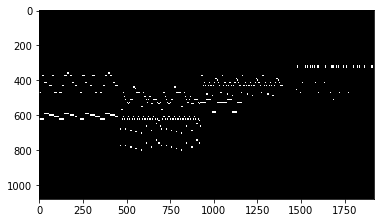

In [67]:
plt.imshow(img[:,:1920], cmap='gray');

In [92]:
for num in range(int(np.ceil(essence_notemat.shape[1] / 1920))):
    plt.imsave(f'./images/midimage{num}.jpg', img[:, 1920 * num : 1920 * (num + 1)], cmap='gray', format='jpeg')